In [448]:
import os
import pandas as pd

# Reading the data

In [449]:
train = pd.read_csv('TrainData.csv') 
test = pd.read_csv('TestData.csv' )

In [450]:
print ('The train has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('The test has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train has 58857 rows and 20 columns
The test has 19594 rows and 19 columns


In [451]:
print(train.columns)
print(test.columns)

Index(['VehicleID', 'DataCollectedDate', 'NameOfTheVehicle', 'SellerType',
       'OfferType', 'Price', 'VehicleType', 'YearOfVehicleRegistration',
       'GearBoxType', 'PowerOfTheEngine', 'ModelOfTheVehicle',
       'DistranceTravelled', 'MonthOfVehicleRegistration', 'TypeOfTheFuelUsed',
       'BrandOfTheVehicle', 'IsDamageRepaired', 'DateOfAdCreation',
       'NumberOfPictures', 'ZipCode', 'DateOfAdLastSeen'],
      dtype='object')
Index(['VehicleID', 'DataCollectedDate', 'NameOfTheVehicle', 'SellerType',
       'OfferType', 'VehicleType', 'YearOfVehicleRegistration', 'GearBoxType',
       'PowerOfTheEngine', 'ModelOfTheVehicle', 'DistranceTravelled',
       'MonthOfVehicleRegistration', 'TypeOfTheFuelUsed', 'BrandOfTheVehicle',
       'IsDamageRepaired', 'DateOfAdCreation', 'NumberOfPictures', 'ZipCode',
       'DateOfAdLastSeen'],
      dtype='object')


In [452]:
#import pandas_profiling as pp
#pp.ProfileReport(test)

In [453]:
test_Id = test.VehicleID.copy()

# Dropping the unwanted columns 

In [454]:
# As the Offertype , sellertype and no.of pictures are constant 
# Vehicle id is not used for prediction

In [455]:
train.drop(['VehicleID','OfferType','SellerType','NumberOfPictures'],axis=1,inplace=True)
test.drop(['VehicleID','OfferType','SellerType','NumberOfPictures'],axis=1,inplace=True)

# Checking the missing values

In [456]:
missing = train.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing['missing_ratio'] = missing['missing_count'] / train.shape[0]
missing.sort_values(by='missing_ratio', ascending=False)

,column_name,missing_count,missing_ratio
12,IsDamageRepaired,6849,0.116367
10,TypeOfTheFuelUsed,2085,0.035425
3,VehicleType,1844,0.031330
5,GearBoxType,1719,0.029206
0,DataCollectedDate,0,0.000000
1,NameOfTheVehicle,0,0.000000
2,Price,0,0.000000
4,YearOfVehicleRegistration,0,0.000000
6,PowerOfTheEngine,0,0.000000
7,ModelOfTheVehicle,0,0.000000


In [457]:
missing_test = test.isnull().sum(axis=0).reset_index()
missing_test.columns = ['column_name', 'missing_count']
missing_test['missing_ratio'] = missing_test['missing_count'] / test.shape[0]
missing_test.sort_values(by='missing_ratio', ascending=False)

,column_name,missing_count,missing_ratio
11,IsDamageRepaired,2245,0.114576
9,TypeOfTheFuelUsed,754,0.038481
2,VehicleType,636,0.032459
4,GearBoxType,504,0.025722
0,DataCollectedDate,0,0.000000
1,NameOfTheVehicle,0,0.000000
3,YearOfVehicleRegistration,0,0.000000
5,PowerOfTheEngine,0,0.000000
6,ModelOfTheVehicle,0,0.000000
7,DistranceTravelled,0,0.000000


In [460]:
import numpy as np
train= train.replace("",np.nan)
test= test.replace("",np.nan)


In [461]:
unique_counts = pd.DataFrame.from_records([(col, train[col].nunique(),train[col].dtypes) for col in train.columns],
                          columns=['Column_Name', 'Unique','dtypes']).sort_values(by=['Unique'])
unique_counts

,Column_Name,Unique,dtypes
5,GearBoxType,2,object
12,IsDamageRepaired,2,object
10,TypeOfTheFuelUsed,7,object
3,VehicleType,8,object
9,MonthOfVehicleRegistration,12,int64
8,DistranceTravelled,13,int64
4,YearOfVehicleRegistration,17,int64
11,BrandOfTheVehicle,38,object
13,DateOfAdCreation,77,object
7,ModelOfTheVehicle,235,object


# datatypes conversion

In [462]:
for col in ['MonthOfVehicleRegistration']:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
        

In [463]:
train.head()

,DataCollectedDate,NameOfTheVehicle,Price,VehicleType,YearOfVehicleRegistration,GearBoxType,PowerOfTheEngine,ModelOfTheVehicle,DistranceTravelled,MonthOfVehicleRegistration,TypeOfTheFuelUsed,BrandOfTheVehicle,IsDamageRepaired,DateOfAdCreation,ZipCode,DateOfAdLastSeen
0,03-04-2016 11:54,Subaru_G3X_Justy_1.3,3850,Small Car,2004,manual,94,Other,50000,7,petrol,subaru,No,03-04-2016 00:00,34474,07-04-2016 13:15
1,08-03-2016 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,5999,Combi,2007,manual,140,passat,150000,5,diesel,volkswagen,No,08-03-2016 00:00,50765,11-03-2016 17:15
2,26-03-2016 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,5990,limousine,2007,automatic,150,c_klasse,150000,2,diesel,mercedes_benz,No,26-03-2016 00:00,90475,26-03-2016 17:38
3,11-03-2016 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,4000,limousine,2005,manual,150,147,150000,9,diesel,alfa_romeo,No,11-03-2016 00:00,40699,12-03-2016 02:45
4,17-03-2016 17:49,Audi_A4,12950,Combi,2005,manual,200,a4,125000,3,petrol,audi,No,17-03-2016 00:00,84347,07-04-2016 04:17


# Date Types conversion

In [464]:
train['DataCollectedDate']=pd.to_datetime(train['DataCollectedDate'])
train['DateOfAdLastSeen']=pd.to_datetime(train['DateOfAdLastSeen'])
train['DateOfAdCreation']=pd.to_datetime(train['DateOfAdCreation'])


In [465]:
test['DataCollectedDate']=pd.to_datetime(test['DataCollectedDate'])
test['DateOfAdLastSeen']=pd.to_datetime(test['DateOfAdLastSeen'])
test['DateOfAdCreation']=pd.to_datetime(test['DateOfAdCreation'])


In [466]:
train['DataCollectedYear'] = train['DataCollectedDate'].dt.year
train['vehicle_age_years'] = ( train['DataCollectedYear']-train['YearOfVehicleRegistration'] )
train['Ad_days'] = ( train['DateOfAdLastSeen']-train['DateOfAdCreation'] ).dt.days

In [467]:
# on test data
test['DataCollectedYear'] = test['DataCollectedDate'].dt.year
test['vehicle_age_years'] = ( test['DataCollectedYear']-test['YearOfVehicleRegistration'] )
test['Ad_days'] = ( test['DateOfAdLastSeen']-test['DateOfAdCreation'] ).dt.days

In [468]:
train.dtypes

DataCollectedDate             datetime64[ns]
NameOfTheVehicle                      object
Price                                  int64
VehicleType                           object
YearOfVehicleRegistration              int64
GearBoxType                           object
PowerOfTheEngine                       int64
ModelOfTheVehicle                     object
DistranceTravelled                     int64
MonthOfVehicleRegistration          category
TypeOfTheFuelUsed                     object
BrandOfTheVehicle                     object
IsDamageRepaired                      object
DateOfAdCreation              datetime64[ns]
ZipCode                                int64
DateOfAdLastSeen              datetime64[ns]
DataCollectedYear                      int64
vehicle_age_years                      int64
Ad_days                                int64
dtype: object

In [469]:
test.dtypes

DataCollectedDate             datetime64[ns]
NameOfTheVehicle                      object
VehicleType                           object
YearOfVehicleRegistration              int64
GearBoxType                           object
PowerOfTheEngine                       int64
ModelOfTheVehicle                     object
DistranceTravelled                     int64
MonthOfVehicleRegistration          category
TypeOfTheFuelUsed                     object
BrandOfTheVehicle                     object
IsDamageRepaired                      object
DateOfAdCreation              datetime64[ns]
ZipCode                                int64
DateOfAdLastSeen              datetime64[ns]
DataCollectedYear                      int64
vehicle_age_years                      int64
Ad_days                                int64
dtype: object

# Dropping the date columns

In [470]:
train.drop(['DataCollectedDate','DateOfAdCreation','DateOfAdLastSeen','DataCollectedYear','YearOfVehicleRegistration'],axis=1,inplace=True)


In [471]:
test.drop(['DataCollectedDate','DateOfAdCreation','DateOfAdLastSeen','DataCollectedYear','YearOfVehicleRegistration'],axis=1,inplace=True)

# replacing the unique values in IsDamageRequired

In [472]:
train['IsDamageRepaired']=train['IsDamageRepaired'].replace({'No':0,'Yes':1})
test['IsDamageRepaired']=test['IsDamageRepaired'].replace({'No':0,'Yes':1})


In [473]:
# converting object type to categorical type
for col in ['NameOfTheVehicle','VehicleType','GearBoxType','ModelOfTheVehicle',
            'TypeOfTheFuelUsed','BrandOfTheVehicle','IsDamageRepaired']:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')   

# Checking the skewness of the target variable

Skewness: 1.741881
Kurtosis: 3.239900


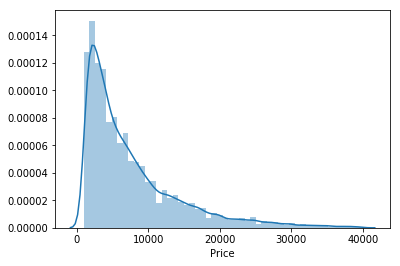

In [474]:
import seaborn as sns
sns.distplot(train['Price'])
print("Skewness: %f" % train.Price.skew())
print("Kurtosis: %f" % train.Price.kurt())


In [475]:
# As the target is right skewed we need to make it as normally distributed

In [476]:
train['log_Price']=np.log(train['Price'])
train.drop('Price',axis=1,inplace=True)


In [477]:
train.shape

(58857, 14)

Skewness: 0.104807
Kurtosis: -0.798373


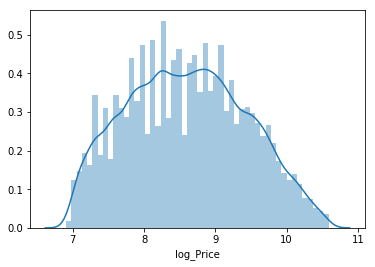

In [478]:
sns.distplot(train['log_Price'])
print("Skewness: %f" % train.log_Price.skew())
print("Kurtosis: %f" % train.log_Price.kurt())


In [479]:
train.dtypes

NameOfTheVehicle              category
VehicleType                   category
GearBoxType                   category
PowerOfTheEngine                 int64
ModelOfTheVehicle             category
DistranceTravelled               int64
MonthOfVehicleRegistration    category
TypeOfTheFuelUsed             category
BrandOfTheVehicle             category
IsDamageRepaired              category
ZipCode                          int64
vehicle_age_years                int64
Ad_days                          int64
log_Price                      float64
dtype: object

# univariant analysis

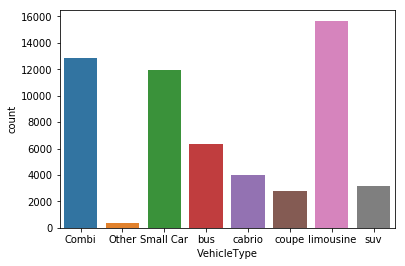

In [480]:

sns.countplot(x="VehicleType", data=train)

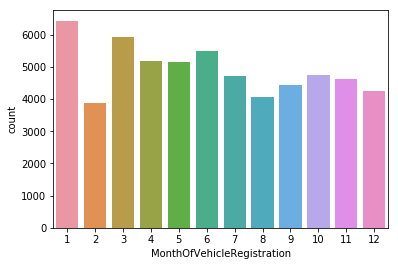

In [482]:

sns.countplot(x="MonthOfVehicleRegistration", data=train)

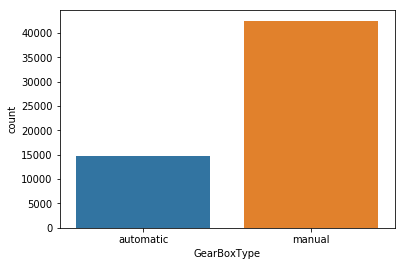

In [483]:

sns.countplot(x="GearBoxType", data=train)

# cheching the relation of numerical variables with respect to log_price

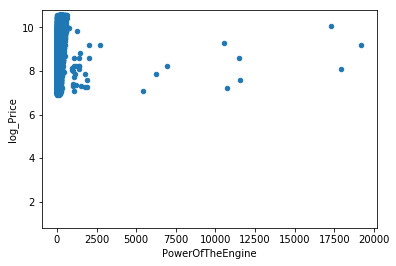

In [484]:
var = 'PowerOfTheEngine'
data1 = pd.concat([train['log_Price'], train[var]],axis=1)
data1.plot.scatter(x=var, y='log_Price',ylim=(0.8000))

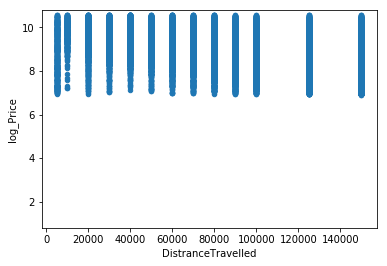

In [485]:
var = 'DistranceTravelled'
data2 = pd.concat([train['log_Price'], train[var]],axis=1)
data2.plot.scatter(x=var, y='log_Price',ylim=(0.8000))

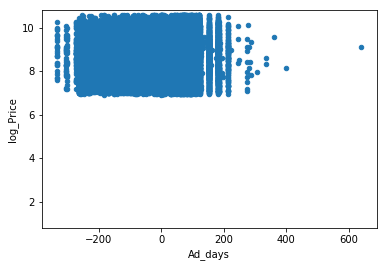

In [486]:
var = 'Ad_days'
data3 = pd.concat([train['log_Price'], train[var]],axis=1)
data3.plot.scatter(x=var, y='log_Price',ylim=(0.8000))

In [489]:
train.BrandOfTheVehicle.value_counts().sort_values(ascending=False).head(15)

volkswagen       11829
bmw               6996
mercedes_benz     6028
audi              5970
opel              5348
ford              3815
renault           2440
peugeot           1890
fiat              1315
skoda             1310
seat              1236
smart             1153
citroen            938
mazda              933
toyota             930
Name: BrandOfTheVehicle, dtype: int64

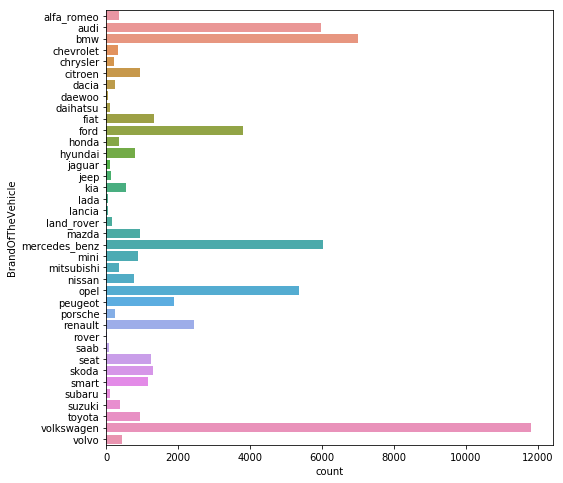

In [490]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,8))
fig = sns.countplot(y='BrandOfTheVehicle',data=train)

In [491]:
top = train.BrandOfTheVehicle.value_counts().sort_values(ascending=False).head(15)
sum(top)

52131

* these 15 companies cars are the most selling cars out of the total data *

# checking the categorical w.r.t log_price

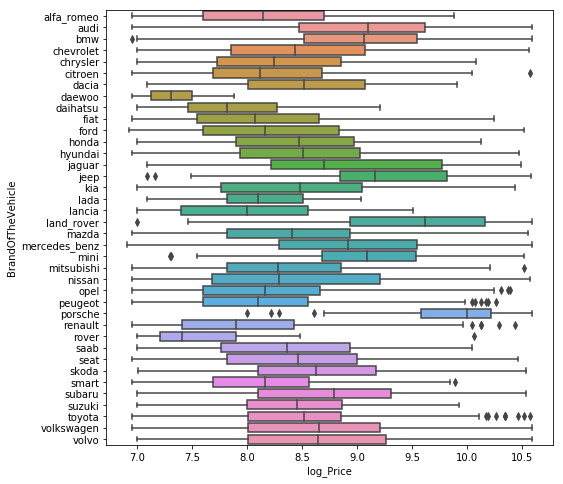

In [492]:
var = 'BrandOfTheVehicle'
data = pd.concat([train['log_Price'], train[var].dropna()],axis=1)
f, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(x='log_Price', y=var,data=data)
#fig.axis(ymin=0, ymax=800000)

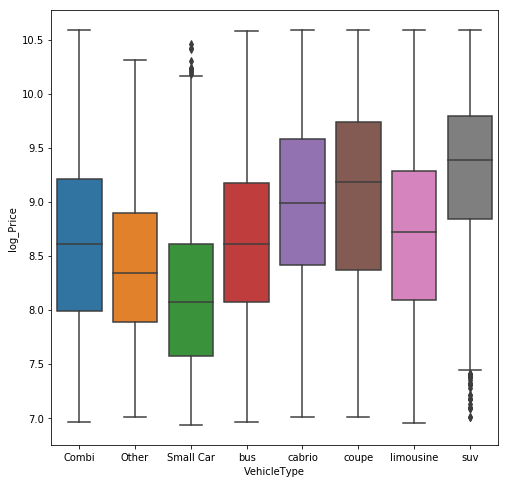

In [493]:
var = 'VehicleType'
data = pd.concat([train['log_Price'], train[var].dropna()],axis=1)
f, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(x=var, y='log_Price',data=data)
#fig.axis(ymin=0, ymax=800000)

In [494]:
#We observe that SUV is the most expensive vehicle type while small car is the cheapest. 
#However, kleinwagen have many outliers which may signify either user error or specific higher end brand and model combination.

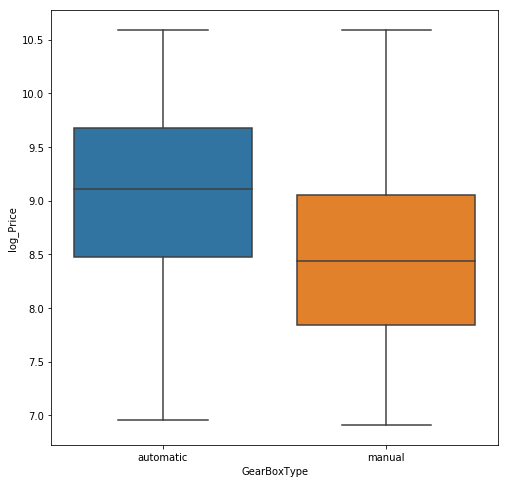

In [495]:
var = 'GearBoxType'
data = pd.concat([train['log_Price'], train[var].dropna()],axis=1)
f, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(x=var, y='log_Price',data=data)
#fig.axis(ymin=0, ymax=800000)

In [496]:
 #the second hand cars with automatic gear type are more expensive than manual

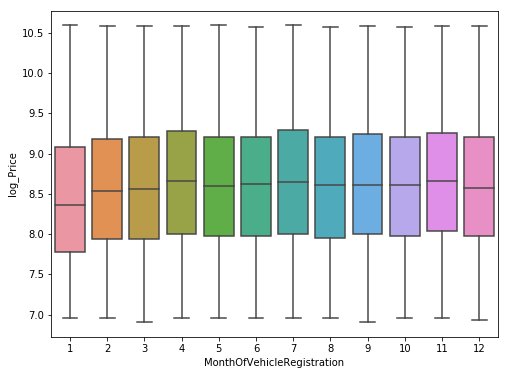

In [497]:
import matplotlib.pyplot as plt
var = 'MonthOfVehicleRegistration'
data = pd.concat([train['log_Price'], train[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='log_Price',data=data)
#fig.axis(ymin=0, ymax=800000)

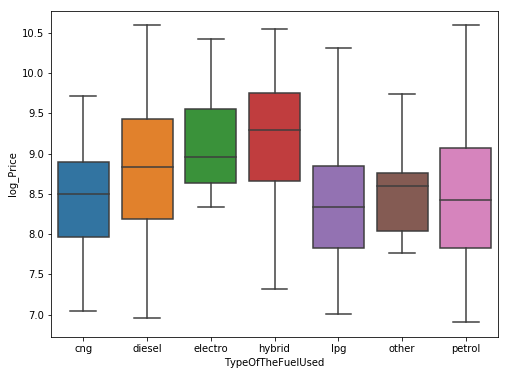

In [498]:
var = 'TypeOfTheFuelUsed'
data = pd.concat([train['log_Price'], train[var].dropna()],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='log_Price',data=data)
#fig.axis(ymin=0, ymax=800000)

(-0.5, 1.5, 1.5, 2500)

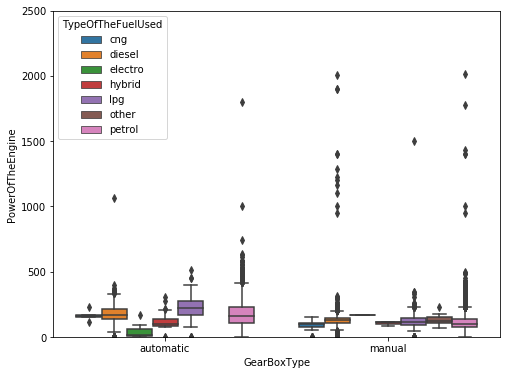

In [499]:
var = 'PowerOfTheEngine'
data = pd.concat([train['GearBoxType'].dropna(), train[var].dropna()],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='GearBoxType', y=var,hue=train['TypeOfTheFuelUsed'],data=data)
fig.axis(ymin=1.5, ymax=2500)

# petrol cars with automatic gear box has more performance than the other types**

# correlation

In [500]:
cate_Attri = train.select_dtypes(include=['category']).columns
nume_Attri = train.select_dtypes(exclude=['category']).columns

In [501]:
corr_matrix = train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
train.drop(axis=1,columns=to_drop,inplace=True)


In [502]:
# any columns are not highly correlated

In [503]:
cate_Attri1 = test.select_dtypes(include=['category']).columns
nume_Attri1 = test.select_dtypes(exclude=['category']).columns

corr_matrix = test.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
test.drop(axis=1,columns=to_drop,inplace=True)


In [504]:
print(test.dtypes)
print('__________________________')
print(train.dtypes)

NameOfTheVehicle              category
VehicleType                   category
GearBoxType                   category
PowerOfTheEngine                 int64
ModelOfTheVehicle             category
DistranceTravelled               int64
MonthOfVehicleRegistration    category
TypeOfTheFuelUsed             category
BrandOfTheVehicle             category
IsDamageRepaired              category
ZipCode                          int64
vehicle_age_years                int64
Ad_days                          int64
dtype: object
__________________________
NameOfTheVehicle              category
VehicleType                   category
GearBoxType                   category
PowerOfTheEngine                 int64
ModelOfTheVehicle             category
DistranceTravelled               int64
MonthOfVehicleRegistration    category
TypeOfTheFuelUsed             category
BrandOfTheVehicle             category
IsDamageRepaired              category
ZipCode                          int64
vehicle_age_years      

In [505]:
train.drop(['BrandOfTheVehicle','ModelOfTheVehicle','NameOfTheVehicle'],axis=1,inplace=True)
test.drop(['BrandOfTheVehicle','ModelOfTheVehicle','NameOfTheVehicle'],axis=1,inplace=True)

# Splitting the data

In [506]:
from sklearn.model_selection import train_test_split
y_train = train['log_Price']
X_train = train.drop('log_Price',axis=1)


X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.3, random_state=123)
X_train.shape, X_val.shape

((41199, 10), (17658, 10))

# imputing the missing values

In [507]:
X_train['VehicleType'].fillna(X_train['VehicleType'].mode()[0],inplace=True)
X_val['VehicleType'].fillna(X_val['VehicleType'].mode()[0],inplace=True)
test['VehicleType'].fillna(test['VehicleType'].mode()[0],inplace=True)

In [508]:
X_train['GearBoxType'].fillna(X_train['GearBoxType'].mode()[0],inplace=True)
X_val['GearBoxType'].fillna(X_val['GearBoxType'].mode()[0],inplace=True)
test['GearBoxType'].fillna(test['GearBoxType'].mode()[0],inplace=True)

In [509]:
X_train['TypeOfTheFuelUsed'].fillna(X_train['TypeOfTheFuelUsed'].mode()[0],inplace=True)
X_val['TypeOfTheFuelUsed'].fillna(X_val['TypeOfTheFuelUsed'].mode()[0],inplace=True)
test['TypeOfTheFuelUsed'].fillna(test['TypeOfTheFuelUsed'].mode()[0],inplace=True)

In [510]:
X_train['IsDamageRepaired'].fillna(X_train['IsDamageRepaired'].mode()[0],inplace=True)
X_val['IsDamageRepaired'].fillna(X_val['IsDamageRepaired'].mode()[0],inplace=True)
test['IsDamageRepaired'].fillna(test['IsDamageRepaired'].mode()[0],inplace=True)

# dummifying the categorical variables

In [511]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_val = pd.get_dummies(X_val,drop_first=True)
test = pd.get_dummies(test,drop_first=True)


# Standardizing the data

In [512]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:])

X_train.iloc[:,:] = scaler.transform(X_train.iloc[:,:])
X_val.iloc[:,:] = scaler.transform(X_val.iloc[:,:])
test.iloc[:,:] = scaler.transform(test.iloc[:,:])

C:\Users\vedavyas udutha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vedavyas udutha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\vedavyas udutha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
C:\Users\vedavyas udutha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys


In [513]:
test.shape

(19594, 31)

# MOdel building

# Linear Regression

In [514]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

preds_val_lr = linear.predict(X_val)
#preds_test_lr = linear.predict(X_test)

lr_mse_val = mean_squared_error(preds_val_lr, y_val)
lr_rmse_val = np.sqrt(lr_mse_val)
print("Linear Regression MSE on val: %.4f" %lr_mse_val)
print('Linear Regression RMSE on val: %.4f' % lr_rmse_val)

Linear Regression MSE on val: 0.3649
Linear Regression RMSE on val: 0.6041


# Decision Tree

In [515]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz,DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(X_train, y_train)

preds_val_DT = DTR.predict(X_val)
#preds_test_DT = DTR.predict(X_test)

DT_mse_val = mean_squared_error(preds_val_DT, y_val)
DT_rmse_val = np.sqrt(DT_mse_val)

print("Decision Tree Regressor MSE on val: %.4f" %DT_mse_val)
print('Decision Tree Regressor RMSE on val: %.4f' % DT_rmse_val)

Decision Tree Regressor MSE on val: 0.2142
Decision Tree Regressor RMSE on val: 0.4629


# RandomForest

In [516]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=120,max_depth=10,min_samples_split=5,random_state=42)
RFR.fit(X_train, y_train)
preds_val_RF = RFR.predict(X_val)
#preds_test_RF = RFR.predict(X_test)

RF_mse_val = mean_squared_error(preds_val_RF, y_val)
RF_rmse_val = np.sqrt(RF_mse_val)

print("Random Forest Regressor MSE on val: %.4f" %RF_mse_val)
print('Random Forest Regressor RMSE on val: %.4f' % RF_rmse_val)

Random Forest Regressor MSE on val: 0.1208
Random Forest Regressor RMSE on val: 0.3475


# XGboost

In [517]:
from xgboost import XGBRegressor
XGB = XGBRegressor(colsample_bytree=0.6, max_depth = 10,n_estimators = 200,random_state=0,alpha=0.1)
XGB.fit(X_train, y_train)

preds_val_XG = XGB.predict(X_val)
preds_test_XG = XGB.predict(test)

XG_mse_val = mean_squared_error(preds_val_XG, y_val)
XG_rmse_val = np.sqrt(XG_mse_val)

print("XGB Regressor MSE on val: %.4f" %XG_mse_val)
print('XGB Regressor RMSE on val: %.4f' % XG_rmse_val)

XGB Regressor MSE on val: 0.0997
XGB Regressor RMSE on val: 0.3158


# Adaboost Regressor

In [518]:
from sklearn.ensemble import AdaBoostRegressor

Ada = AdaBoostRegressor()
Ada.fit(X_train, y_train)

preds_val_Ada = Ada.predict(X_val)
#preds_test_Ada = Ada.predict(X_test)

Ada_mse_val = mean_squared_error(preds_val_Ada, y_val)
Ada_rmse_val = np.sqrt(Ada_mse_val)
print("AdaboostRegressor MSE on val: %.4f" %Ada_mse_val)
print('AdaboostRegressor RMSE on val: %.4f' % Ada_rmse_val)

AdaboostRegressor MSE on val: 0.2379
AdaboostRegressor RMSE on val: 0.4877


# Sample Submission

In [519]:
submission = pd.DataFrame()
submission['Id'] = test_Id

In [520]:
# Transform the Predicitons to correct form
final_predictions = np.exp(preds_test_XG)

In [521]:
submission['Price'] = final_predictions
submission.head()

,Id,Price
0,60001,8119.684570
1,60002,3504.831299
2,60003,22396.109375
3,60004,6423.480957
4,60005,2242.975342


In [522]:
submission.to_csv('sample_submission5.csv', index=False)

# The best model is XGBoost